In [2]:
### CLUSTER AND CLOUD COMPUTING ASSIGNMENT 2 ###
### TEAM 20 -------------------------------  ###
### Lachlan Rowles (1081611) --------------  ###
### Muhammad Shafaryantoro (1397084) ------  ###
### Vanessa Gracia Tan (1297696) ----------  ###
### Viane Dorthea Tiwa (1413279) ----------  ###
### Muhammad Bayu Prakoso Aji (1696174) ---  ###
### PERSON IN CHARGE: MUHAMMAD SHAFARYANTORO

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import numpy as np

In [42]:
# 1. Time Series Plot for daily averages
def plot_time_series(df, date_col, value_cols, title):
    df = df.sort_values(by = date_col, ascending = True)
    plt.figure(figsize=(14, 6))
    for col in value_cols:
        plt.plot(df[date_col], df[col], label = col)
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [4]:
# 2. Bar Chart for Subreddit comparison
def plot_subreddit_barchart(df, subreddit_col, y1_col, y2_col, title):
    df_sorted = df.sort_values(by = y1_col, ascending = False)
    x = np.arange(len(df_sorted))
    width = 0.35

    plt.figure(figsize=(12, 6))
    plt.bar(x - width / 2, df_sorted[y1_col], width = width, label = y1_col)
    plt.bar(x + width / 2, df_sorted[y2_col], width = width, label = y2_col)
    plt.xticks(ticks=x, labels=df_sorted[subreddit_col], rotation=45)
    plt.xlabel("Subreddit")
    plt.ylabel("Value")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.grid()
    plt.show()


In [5]:
# 3. Correlation Heatmap
def plot_correlation_heatmap(df, cols, title):
    corr = df[cols].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot = True, cmap = "coolwarm", fmt = ".2f")
    plt.title(title)
    plt.tight_layout()
    plt.show()

In [6]:
# 4. Word Cloud
def plot_wordcloud(text_series, title):
    text = " ".join(text_series.dropna().astype(str).tolist())
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(width = 800, height = 400, background_color = 'white',
                          stopwords=stopwords, collocations = False).generate(text)

    plt.figure(figsize = (12, 6))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.title(title, fontsize = 18, weight = 'bold')
    plt.tight_layout()
    plt.show()

In [7]:
# 5. Spider/Radar Chart
def plot_spider_chart(values_dict, title):
    labels = list(values_dict.keys())
    values = list(values_dict.values())
    values += values[:1]  # repeat the first value to close the circle

    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize = (6, 6), subplot_kw = dict(polar = True))
    ax.plot(angles, values, 'o-', linewidth=2)
    ax.fill(angles, values, alpha=0.25)
    ax.set_thetagrids(np.degrees(angles[:-1]), labels)
    ax.set_title(title)
    plt.tight_layout()
    plt.show()

In [32]:
example = pd.read_csv('trial_analysis.csv')
example

,_id,_index,_score,author,author.keyword,created_at,created_at.keyword,id,id.keyword,num_comments,...,sentiment.subjectivity,source,source.keyword,subreddit,subreddit.keyword,title,title.keyword,upvote_ratio,url,url.keyword
0,1kkp38s,reddit-new,1,p0ison_ivy_,p0ison_ivy_,12-05-25 10:25:55,12-05-25 10:25:55,1kkp38s,1kkp38s,0,...,0.000,reddit,reddit,brisbane,brisbane,🔌,🔌,1.00,https://www.reddit.com/r/brisbane/comments/1kk...,https://www.reddit.com/r/brisbane/comments/1kk...
1,1kkp1n4,reddit-new,1,p0ison_ivy_,p0ison_ivy_,12-05-25 10:23:02,12-05-25 10:23:02,1kkp1n4,1kkp1n4,5,...,0.000,reddit,reddit,brisbane,brisbane,Plugzz?,Plugzz?,0.20,https://www.reddit.com/r/brisbane/comments/1kk...,https://www.reddit.com/r/brisbane/comments/1kk...
2,1kkm311,reddit-new,1,Present-Oil-6111,Present-Oil-6111,12-05-25 06:53:14,12-05-25 06:53:14,1kkm311,1kkm311,16,...,1.000,reddit,reddit,perth,perth,Searching for kronenberg 1664 blanc,Searching for kronenberg 1664 blanc,0.58,https://www.reddit.com/r/perth/comments/1kkm31...,https://www.reddit.com/r/perth/comments/1kkm31...
3,1kfztaq,reddit-new,1,TenatiousTides,TenatiousTides,06-05-25 08:58:50,06-05-25 08:58:50,1kfztaq,1kfztaq,40,...,0.484,reddit,reddit,canberra,canberra,Where to find the best variety of soda?,Where to find the best variety of soda?,0.35,https://www.reddit.com/r/canberra/comments/1kf...,https://www.reddit.com/r/canberra/comments/1kf...
4,1kfzo1e,reddit-new,1,Few-Individual8612,Few-Individual8612,06-05-25 08:47:53,06-05-25 08:47:53,1kfzo1e,1kfzo1e,13,...,0.444,reddit,reddit,canberra,canberra,Car Service Recommendation,Car Service Recommendation,0.56,https://www.reddit.com/r/canberra/comments/1kf...,https://www.reddit.com/r/canberra/comments/1kf...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,1kkfrot,reddit-new,1,Ok_Mud5842,Ok_Mud5842,12-05-25 00:40:40,12-05-25 00:40:40,1kkfrot,1kkfrot,39,...,0.563,reddit,reddit,darwin,darwin,Is that dangerous to use Kayak fishing in NT?,Is that dangerous to use Kayak fishing in NT?,0.94,https://www.reddit.com/r/darwin/comments/1kkfr...,https://www.reddit.com/r/darwin/comments/1kkfr...
1463,1kifhgn,reddit-new,1,fletch44,fletch44,09-05-25 10:48:21,09-05-25 10:48:21,1kifhgn,1kifhgn,67,...,1.000,reddit,reddit,australia,australia,Labor claims victory in Bullwinkel in final WA...,Labor claims victory in Bullwinkel in final WA...,0.99,https://www.abc.net.au/news/2025-05-09/labor-t...,https://www.abc.net.au/news/2025-05-09/labor-t...
1464,1kl8y3s,reddit-new,1,kellybamboo,kellybamboo,13-05-25 00:46:50,13-05-25 00:46:50,1kl8y3s,1kl8y3s,1,...,0.425,reddit,reddit,perth,perth,Quiz night this Saturday 17th.,Quiz night this Saturday 17th.,1.00,https://www.reddit.com/r/perth/comments/1kl8y3...,https://www.reddit.com/r/perth/comments/1kl8y3...
1465,1kf4qly,reddit-new,1,Suspicious_Stick_660,Suspicious_Stick_660,05-05-25 06:17:12,05-05-25 06:17:12,1kf4qly,1kf4qly,0,...,0.600,reddit,reddit,Gaza,Gaza,Anti-Zionist Orthodox Jews rally against Israe...,Anti-Zionist Orthodox Jews rally against Israe...,1.00,https://youtube.com/shorts/h9xc8UKH1Ss?si=7c5s...,https://youtube.com/shorts/h9xc8UKH1Ss?si=7c5s...


In [9]:
example.columns

Index(['_id', '_index', '_score', 'author', 'author.keyword', 'created_at',
       'created_at.keyword', 'id', 'id.keyword', 'num_comments', 'num_upvotes',
       'selftext', 'selftext.keyword', 'sentiment.compound',
       'sentiment.negative', 'sentiment.neutral', 'sentiment.positive',
       'sentiment.subjectivity', 'source', 'source.keyword', 'subreddit',
       'subreddit.keyword', 'title', 'title.keyword', 'upvote_ratio', 'url',
       'url.keyword'],
      dtype='object')

In [50]:
list_number = ['created_at', 'num_comments', 'sentiment.compound', 'sentiment.subjectivity', 'upvote_ratio']
example_number = example[list_number]
import warnings
warnings.filterwarnings('ignore')
example_number['created_at'] = pd.to_datetime(example['created_at'], format = '%d-%m-%y %H:%M:%S', errors = 'coerce').dt.strftime('%y-%m-%d')
example_number.dtypes

created_at                 object
num_comments                int64
sentiment.compound        float64
sentiment.subjectivity    float64
upvote_ratio              float64
dtype: object

In [52]:
group_date = example_number.groupby('created_at').mean().reset_index()
group_date.head()

,created_at,num_comments,sentiment.compound,sentiment.subjectivity,upvote_ratio
0,19-06-02,0.0,0.589000,0.333000,1.000000
1,24-02-21,1.0,0.128000,0.575000,1.000000
2,24-02-28,13.0,0.402000,0.498000,0.670000
3,24-12-23,2.0,-0.097857,0.348286,0.955714
4,24-12-24,0.6,-0.385200,0.495400,0.916000


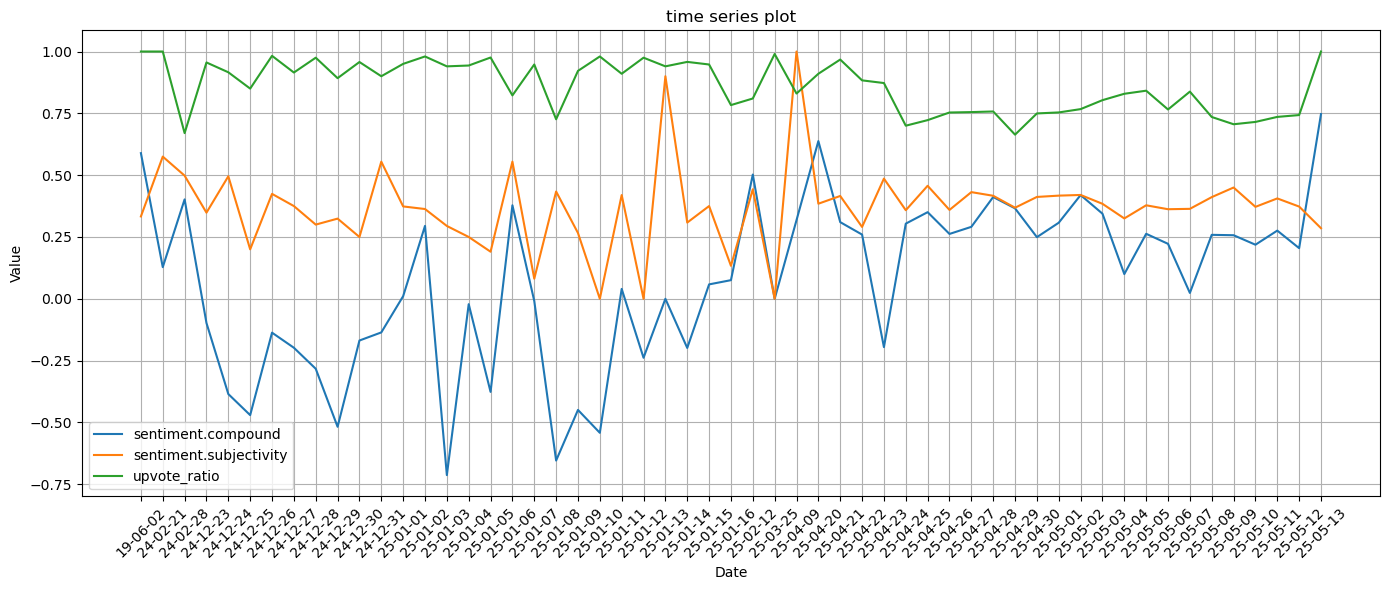

In [54]:
plot_time_series(group_date, 'created_at', ['sentiment.compound', 'sentiment.subjectivity', 'upvote_ratio'], title = 'time series plot')

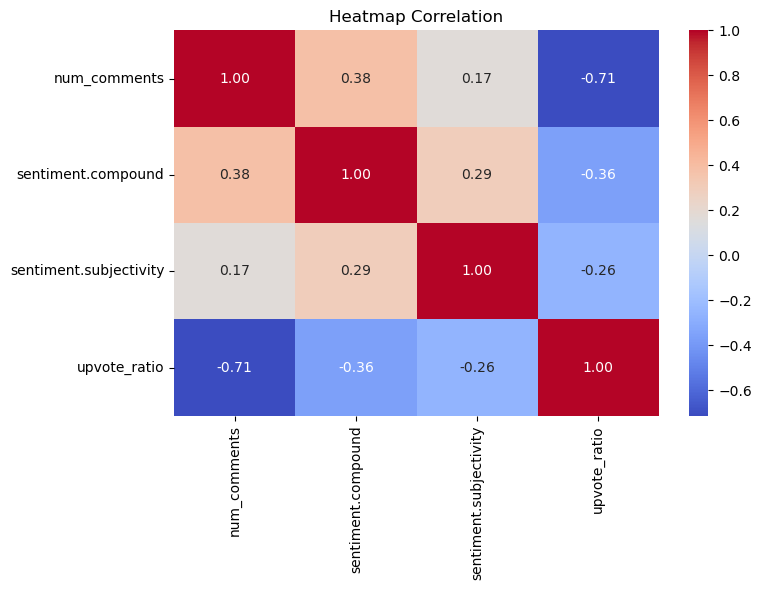

In [13]:
plot_correlation_heatmap(group_date, ['num_comments', 'sentiment.compound', 'sentiment.subjectivity', 'upvote_ratio'], "Heatmap Correlation")

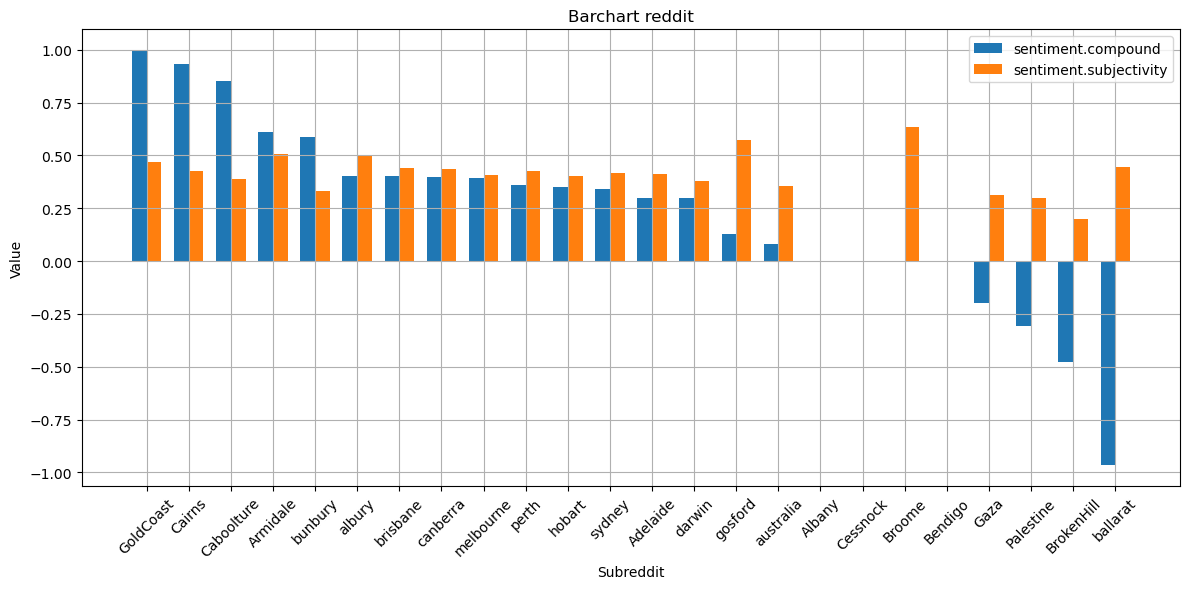

In [14]:
list_subreddit = ['subreddit', 'num_comments', 'sentiment.compound', 'sentiment.subjectivity', 'upvote_ratio']
example_subreddit = example[list_subreddit] 
group_subreddit = example_subreddit.groupby('subreddit').mean().reset_index()
plot_subreddit_barchart(group_subreddit, 'subreddit', 'sentiment.compound', 'sentiment.subjectivity', 'Barchart reddit')


In [15]:
example_text = example[['title', 'selftext']]
example_text['join'] = example_text['title'] + " " + example_text['selftext']

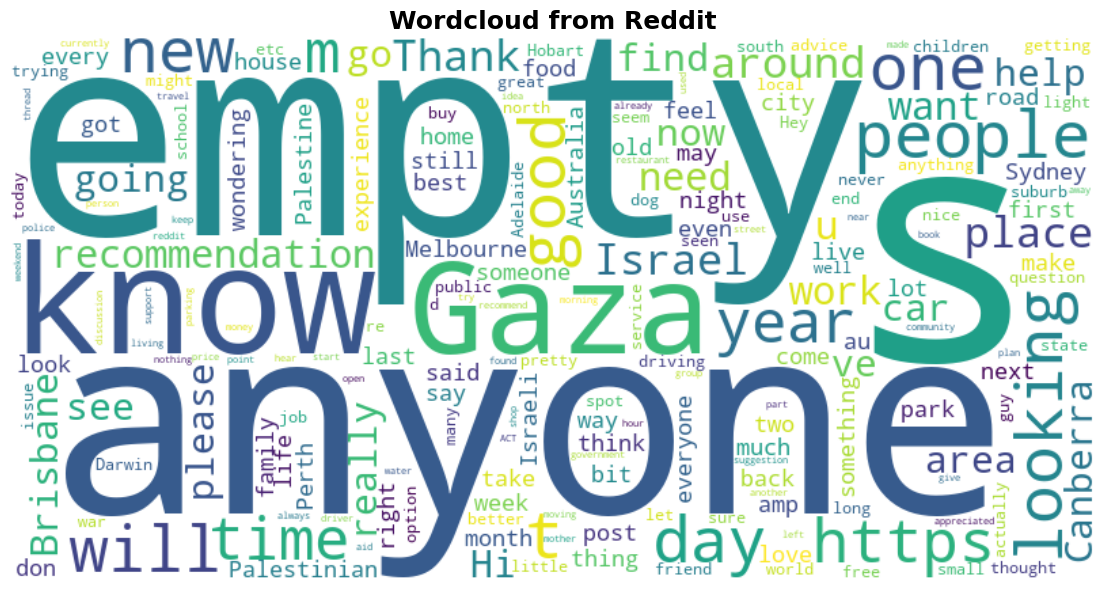

In [16]:
plot_wordcloud(example_text['join'], title = "Wordcloud from Reddit")